In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Dropout, Flatten





c:\Users\Nivendhiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Nivendhiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Nivendhiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tenso

find how many flower images in each flower folder👇👇


In [2]:
count=0
dirs=os.listdir('Images/')
for dir in dirs:
    files=list(os.listdir ('Images/'+ dir))
    print(dir +'  folder has ' + str(len(files))+' images')
    count=count+len(files)
print('total  Flower images '+str(count))

daisy  folder has 764 images
dandelion  folder has 1052 images
rose  folder has 784 images
sunflower  folder has 733 images
tulip  folder has 984 images
total  Flower images 4317


the images are in the folders are as files so convert it into the numpy arrays👇👇

In [3]:
base_dir='images'
#image width and height as 180px
img_size=180
#32 images as in one bacth
batch=32

In [4]:
train_ds=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                     seed=123,#seed use for control randomenss
                                                     validation_split=0.2,#80% use training dataset and 20% as validation split
                                                     subset='training',
                                                     batch_size=batch,
                                                     image_size=(img_size,img_size))

val_ds=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                     seed=123,#seed use for control randomenss
                                                     validation_split=0.2,#80% use training dataset and 20% as validation split
                                                     subset='validation',
                                                     batch_size=batch,
                                                     image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names=train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
import matplotlib.pyplot as plt

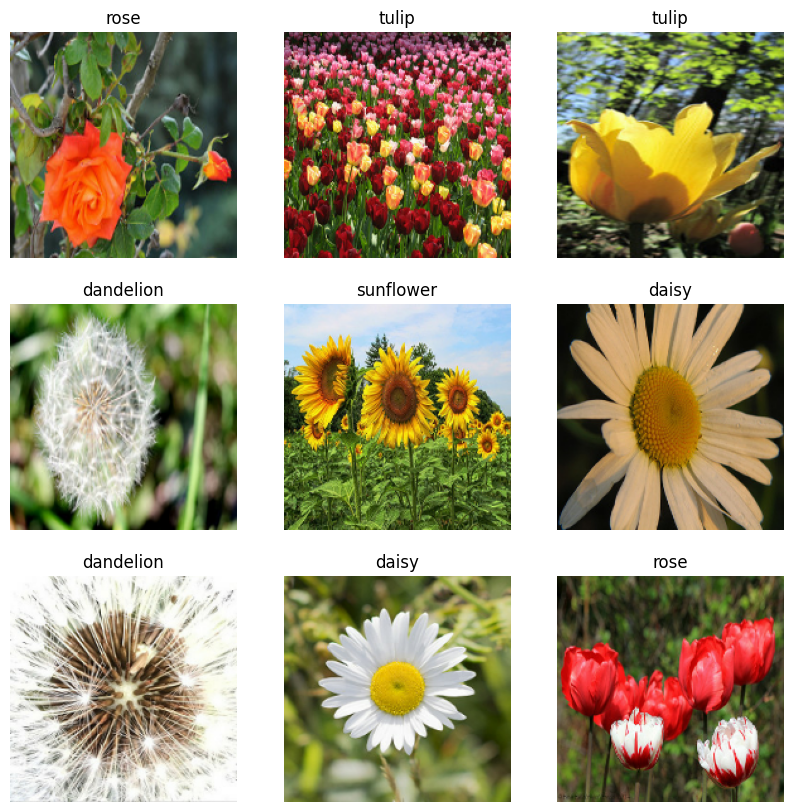

In [7]:
#print random images from all datasets
i=0
plt.figure(figsize=(10,10))

for images,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')


In [8]:
AUTOTUNE=tf.data.AUTOTUNE

In [9]:

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

use data Agumentation.
the data Agumentation works by it take randomly a single sample image then it use random zooming, random rotation, random flip by taking these randomzation it analysis all images samples in single image👇👇


the main use of data agumentation is it avoid overfittting

In [10]:
data_agumentation=Sequential([
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size,3)),# 3 means rgp colour combination is 3 and 3 dimensions
    layers.RandomRotation(0.1)])

c:\Users\Nivendhiran\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


after data agumentation👇👇👇

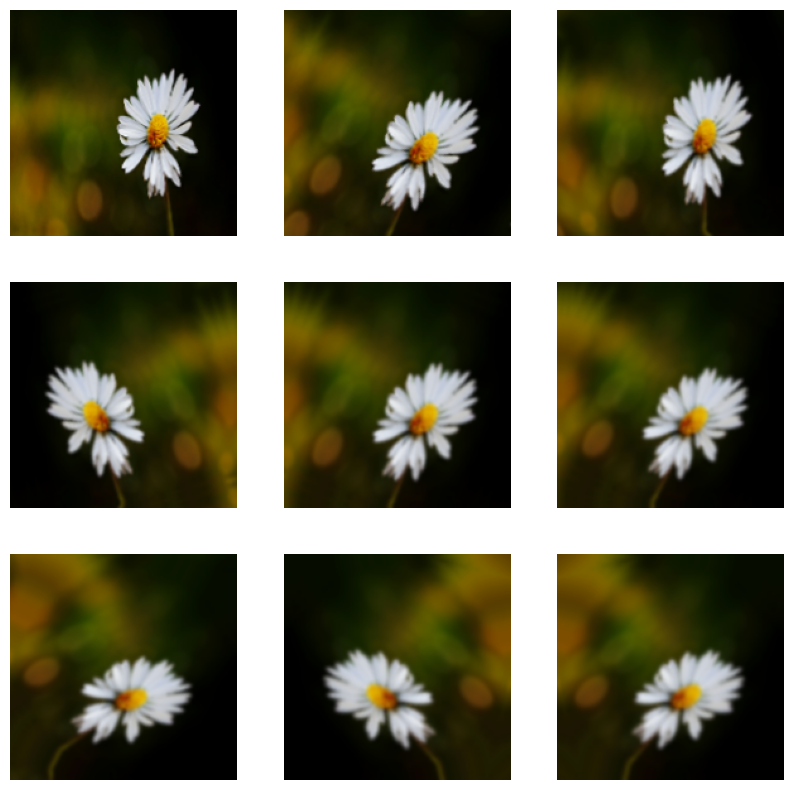

In [20]:
#print random images from all datasets
i=0
plt.figure(figsize=(10,10))

for images,labels in train_ds.take(1):
    for i in range(9):
        images=data_agumentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
       
        plt.axis('off')


create model

In [12]:
model=Sequential([
    data_agumentation,
    layers.Rescaling(1./255),#converting image rgp colors 255 to 0 or 1
    Conv2D(16,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, padding='same', activation='relu'),
    MaxPooling2D(),
    #dropout is used for avoid overfitting
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)#5 image files
]) 

complie model👇👇👇

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # since outputs are raw logits
    metrics=['accuracy']
)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

the model has been created

then fit the dataset to the model👇👇

In [15]:
print("Train batches:", len(train_ds))
print("Val batches:", len(val_ds))


Train batches: 108
Val batches: 27


In [16]:
history=model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 355ms/step - accuracy: 0.4198 - loss: 1.3346 - val_accuracy: 0.5632 - val_loss: 1.0643
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - accuracy: 0.5475 - loss: 1.1109 - val_accuracy: 0.6222 - val_loss: 0.9903
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 360ms/step - accuracy: 0.6170 - loss: 0.9777 - val_accuracy: 0.6373 - val_loss: 0.9428
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 401ms/step - accuracy: 0.6462 - loss: 0.9231 - val_accuracy: 0.5446 - val_loss: 1.2375
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - accuracy: 0.6604 - loss: 0.8825 - val_accuracy: 0.6582 - val_loss: 0.8605
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - accuracy: 0.6899 - loss: 0.8091 - val_accuracy: 0.6848 - val_loss: 0.7972
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step - accuracy: 0.6980 - loss: 0.7808 - val_accuracy: 0.7103 - val_loss: 0.7806
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 358ms/step - accuracy: 0.7128 - loss: 0

Training have been done...........

hereafter test the model👇👇👇

In [17]:
def classify_images(image_path):
    input_images=tf.keras.utils.load_img(image_path,target_size=(180,180))
    input_image_array=tf.keras.utils.img_to_array(input_images)
    #our model trained the data by batch wise so we give input also in batch wise
    input_image_exp_dim=tf.expand_dims(input_image_array,0)


    predictions=model.predict(input_image_exp_dim)
    score=tf.nn.softmax(predictions[0])
    outcome='the image belongs to '+ flower_names[np.argmax(score)] +' With the score of ' +str(np.max(score)*100)
    return outcome

    

In [18]:
classify_images('samples/sun_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


'the image belongs to sunflower With the score of 99.68397'

save this file

In [19]:
model.save('flower_class.h5')